# **Experiment Notebook**



In [82]:
# Do not modify this code
!pip install -q utstd

from utstd.ipyrenders import *

In [83]:
# Do not modify this code
import warnings
warnings.simplefilter(action='ignore')

## 0. Import Packages

In [84]:
# <Student to fill this section>
# <Student to fill this section>
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
import requests
import zipfile
import io
from sklearn.model_selection import train_test_split

# Import additional regression algorithms and evaluation metrics
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import pickle
import joblib
import json
from datetime import datetime

---
## A. Project Description


In [85]:
# <Student to fill this section>
student_name = "Afraz Ul Haque"
student_id = "25627377"

In [86]:
# Do not modify this code
print_tile(size="h1", key='student_name', value=student_name)

In [87]:
# Do not modify this code
print_tile(size="h1", key='student_id', value=student_id)

---
## B. Business Understanding

In [88]:
# <Student to fill this section>
business_use_case_description = """
The goal of this project is to predict the exact amount of precipitation (in mm) expected in the next 72 hours
based on current weather conditions. This is a regression problem where we aim to forecast continuous precipitation
values rather than binary rain/no-rain predictions. Accurate precipitation amount forecasts are crucial for:
1) Agricultural water management and irrigation scheduling, 2) Flood risk assessment and early warning systems,
3) Water resource management and reservoir operations, 4) Construction and outdoor event planning,
5) Transportation safety and route optimization during weather events.
"""

In [89]:
# Do not modify this code
print_tile(size="h3", key='business_use_case_description', value=business_use_case_description)

In [90]:
# <Student to fill this section>
business_objectives = """
Accurate precipitation amount predictions enable: 1) Farmers to optimize irrigation timing and water usage,
reducing costs and improving crop yields, 2) Emergency services to prepare appropriate response levels
for different precipitation intensities, 3) Water utilities to manage reservoir levels and water distribution,
4) Insurance companies to assess flood risk and price policies appropriately.
Incorrect predictions impact: 1) Under-prediction leads to flood damage, crop loss, and inadequate emergency response,
2) Over-prediction results in unnecessary evacuations, canceled events, and economic losses,
3) The cost of under-prediction is typically much higher due to potential for property damage and safety risks.
"""

In [91]:
# Do not modify this code
print_tile(size="h3", key='business_objectives', value=business_objectives)

In [92]:
# <Student to fill this section>
stakeholders_expectations_explanations = """
The precipitation amount predictions will be used by: 1) Agricultural sector - precise irrigation scheduling
and crop protection decisions based on expected rainfall amounts, 2) Meteorological services - providing
detailed weather forecasts with quantitative precipitation estimates, 3) Emergency management - scaling
response based on predicted precipitation intensity (light rain vs heavy downpours), 4) Water management
authorities - reservoir operations and flood control decisions, 5) Transportation - road closure decisions
and route recommendations based on expected precipitation severity. Stakeholders expect reliable quantitative
forecasts with known uncertainty levels to make informed risk-based decisions.
"""

In [93]:
# Do not modify this code
print_tile(size="h3", key='stakeholders_expectations_explanations', value=stakeholders_expectations_explanations)

---
## C. Data Understanding

### C.1   Load Datasets


In [ ]:
# <Student to fill this section>
daily_df = pd.read_csv('../data/raw/daily_with_targets.csv')
hourly_df = pd.read_csv('../data/raw/hourly_with_targets.csv')

### C.2 Define Target variable

In [95]:
# <Student to fill this section>


In [96]:
hourly_df.head()

,datetime,temperature_2m,relative_humidity_2m,dew_point_2m,precipitation,rain,pressure_msl,cloud_cover,wind_speed_10m,wind_direction_10m,shortwave_radiation,surface_pressure,cloud_cover_low,cloud_cover_mid,cloud_cover_high,precipitation_next_72h
0,2020-01-01 00:00:00,19.7,78,15.8,0.0,0.0,1013.5,99,19.3,189,0.0,1007.5,63,97,18,2.6
1,2020-01-01 01:00:00,19.5,79,15.7,0.0,0.0,1012.8,100,19.6,193,0.0,1006.8,100,99,86,2.6
2,2020-01-01 02:00:00,19.5,78,15.5,0.0,0.0,1012.9,100,17.5,199,0.0,1006.9,100,77,70,2.6
3,2020-01-01 03:00:00,19.2,77,15.2,0.0,0.0,1012.5,100,17.7,197,0.0,1006.5,100,0,0,2.6
4,2020-01-01 04:00:00,19.6,74,14.8,0.0,0.0,1012.6,100,19.0,195,0.0,1006.6,100,0,0,2.6


In [97]:
# <Student to fill this section>
target_definition_explanations = """
Explain the rationale on the definition of the target variable according to your business use case.
"""

In [98]:
# Do not modify this code
print_tile(size="h3", key='target_definition_explanations', value=target_definition_explanations)

### C.3 Create Target variable

In [99]:
# <Student to fill this section>

target_name = 'precipitation_next_72h'

In [100]:
# Create target variable: precipitation sum over next 72 hours (3 days)
hourly_df = hourly_df.sort_values('datetime').reset_index(drop=True)

# Calculate rolling sum of precipitation for next 72 hours
hourly_df['precipitation_next_72h'] = (hourly_df['precipitation']
                                      .shift(-72)  # Look ahead 72 hours
                                      .rolling(window=72, min_periods=1)
                                      .sum()
                                      .shift(71))  # Align back

# Alternative simpler approach: sum next 72 values directly
precipitation_72h = []
for i in range(len(hourly_df)):
    if i + 72 < len(hourly_df):
        precip_sum = hourly_df['precipitation'].iloc[i+1:i+73].sum()  # Next 72 hours
    else:
        precip_sum = np.nan  # Not enough future data
    precipitation_72h.append(precip_sum)

hourly_df['precipitation_next_72h'] = precipitation_72h

print(f"Target variable created: precipitation_next_72h")
print(f"Non-null values: {hourly_df['precipitation_next_72h'].notna().sum()}")
print(f"Null values: {hourly_df['precipitation_next_72h'].isna().sum()}")

Target variable created: precipitation_next_72h
Non-null values: 48048
Null values: 72


### C.4 Explore Target variable

In [101]:
# <Student to fill this section>
hourly_df[target_name]

0        2.6
1        2.6
2        2.6
3        2.6
4        2.6
        ... 
48115    NaN
48116    NaN
48117    NaN
48118    NaN
48119    NaN
Name: precipitation_next_72h, Length: 48120, dtype: float64

In [102]:
# <Student to fill this section>
target_distribution_explanations = """
provide a detailed analysis on the target variable, its distribution, limitations, issues, ...
"""

=== TARGET VARIABLE ANALYSIS ===
Mean precipitation (72h): 10.03 mm
Median precipitation (72h): 3.50 mm
Max precipitation (72h): 223.40 mm
Min precipitation (72h): 0.00 mm
Standard deviation: 18.07 mm

Zero precipitation periods: 6674 (13.9%)
Light precipitation (0-5mm): 20962 (43.6%)
Moderate precipitation (5-20mm): 13439 (28.0%)
Heavy precipitation (>20mm): 6973 (14.5%)


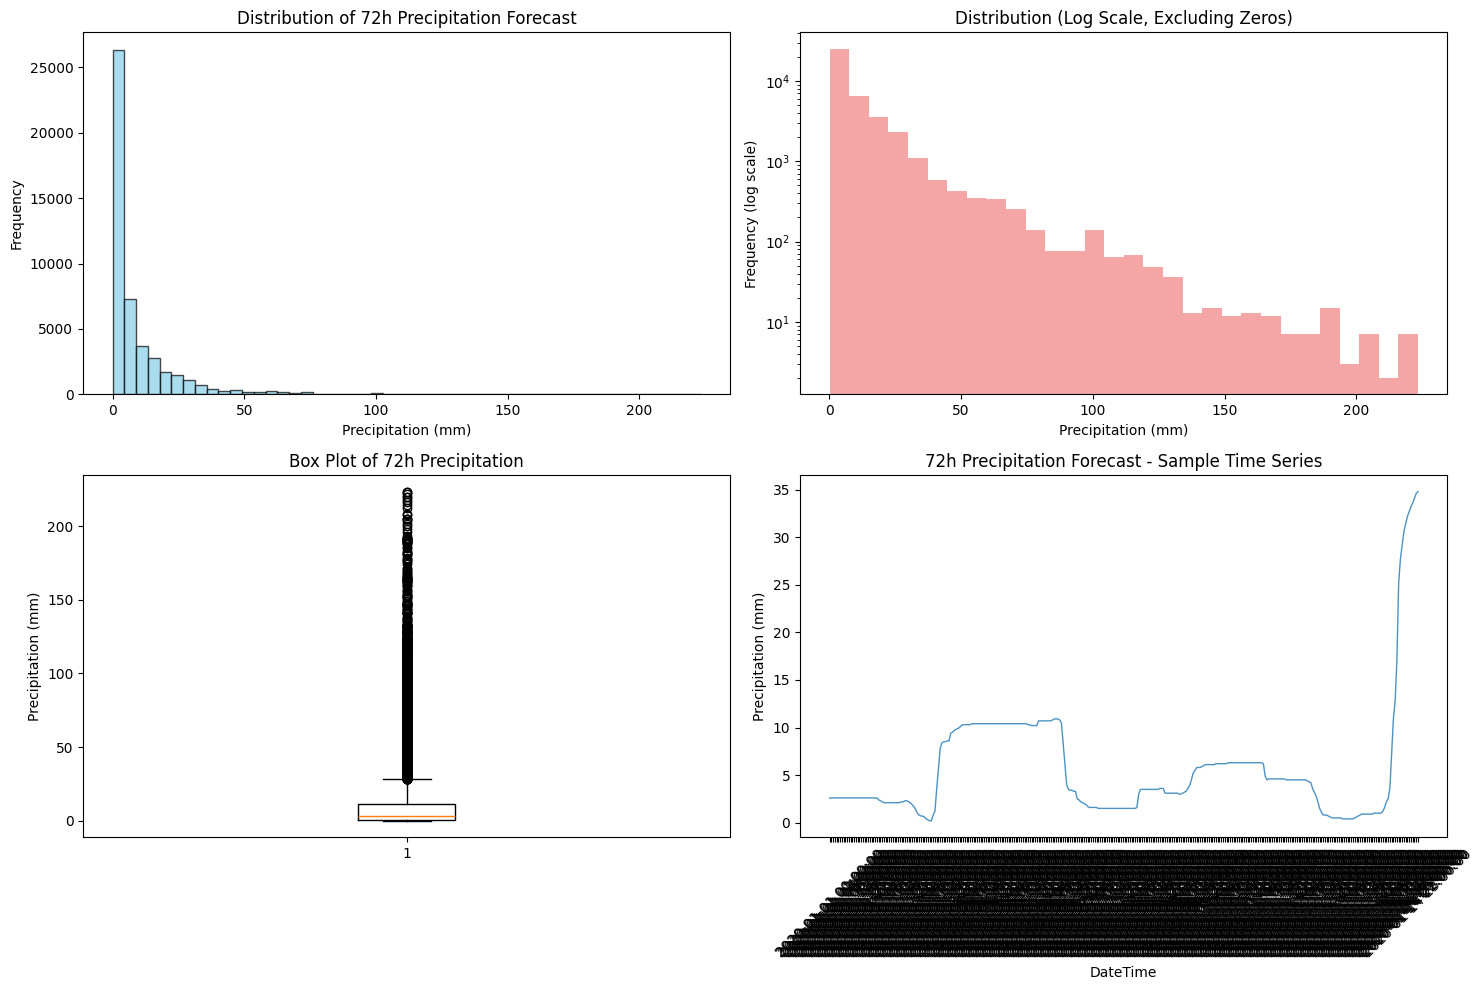

In [103]:
# Analyze target variable distribution
target_col = 'precipitation_next_72h'
valid_targets = hourly_df[target_col].dropna()

print("=== TARGET VARIABLE ANALYSIS ===")
print(f"Mean precipitation (72h): {valid_targets.mean():.2f} mm")
print(f"Median precipitation (72h): {valid_targets.median():.2f} mm")
print(f"Max precipitation (72h): {valid_targets.max():.2f} mm")
print(f"Min precipitation (72h): {valid_targets.min():.2f} mm")
print(f"Standard deviation: {valid_targets.std():.2f} mm")
print(f"\nZero precipitation periods: {(valid_targets == 0).sum()} ({(valid_targets == 0).mean()*100:.1f}%)")
print(f"Light precipitation (0-5mm): {((valid_targets > 0) & (valid_targets <= 5)).sum()} ({((valid_targets > 0) & (valid_targets <= 5)).mean()*100:.1f}%)")
print(f"Moderate precipitation (5-20mm): {((valid_targets > 5) & (valid_targets <= 20)).sum()} ({((valid_targets > 5) & (valid_targets <= 20)).mean()*100:.1f}%)")
print(f"Heavy precipitation (>20mm): {(valid_targets > 20).sum()} ({(valid_targets > 20).mean()*100:.1f}%)")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Distribution histogram
axes[0,0].hist(valid_targets, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Distribution of 72h Precipitation Forecast')
axes[0,0].set_xlabel('Precipitation (mm)')
axes[0,0].set_ylabel('Frequency')

# Log scale histogram (for better visualization of skewed data)
non_zero_targets = valid_targets[valid_targets > 0]
if len(non_zero_targets) > 0:
    axes[0,1].hist(non_zero_targets, bins=30, alpha=0.7, color='lightcoral')
    axes[0,1].set_yscale('log')
    axes[0,1].set_title('Distribution (Log Scale, Excluding Zeros)')
    axes[0,1].set_xlabel('Precipitation (mm)')
    axes[0,1].set_ylabel('Frequency (log scale)')

# Box plot
axes[1,0].boxplot(valid_targets)
axes[1,0].set_title('Box Plot of 72h Precipitation')
axes[1,0].set_ylabel('Precipitation (mm)')

# Time series sample
sample_data = hourly_df.head(24*14)  # First 2 weeks
axes[1,1].plot(sample_data['datetime'], sample_data[target_col], alpha=0.8, linewidth=1)
axes[1,1].set_title('72h Precipitation Forecast - Sample Time Series')
axes[1,1].set_xlabel('DateTime')
axes[1,1].set_ylabel('Precipitation (mm)')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [104]:
# Do not modify this code
print_tile(size="h3", key='target_distribution_explanations', value=target_distribution_explanations)

In [105]:
hourly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   datetime                48120 non-null  object 
 1   temperature_2m          48120 non-null  float64
 2   relative_humidity_2m    48120 non-null  int64  
 3   dew_point_2m            48120 non-null  float64
 4   precipitation           48120 non-null  float64
 5   rain                    48120 non-null  float64
 6   pressure_msl            48120 non-null  float64
 7   cloud_cover             48120 non-null  int64  
 8   wind_speed_10m          48120 non-null  float64
 9   wind_direction_10m      48120 non-null  int64  
 10  shortwave_radiation     48120 non-null  float64
 11  surface_pressure        48120 non-null  float64
 12  cloud_cover_low         48120 non-null  int64  
 13  cloud_cover_mid         48120 non-null  int64  
 14  cloud_cover_high        48120 non-null

## D.z Final Selection of Features

In [106]:
hourly_df['datetime'] = pd.to_datetime(hourly_df['datetime'], errors='coerce')
hourly_df['year'] = hourly_df['datetime'].dt.year.astype('int32')
hourly_df['month'] = hourly_df['datetime'].dt.month.astype('int32')
hourly_df['day'] = hourly_df['datetime'].dt.day.astype('int32')
hourly_df['hour'] = hourly_df['datetime'].dt.hour.astype('int32')

In [108]:
from sklearn.feature_selection import mutual_info_regression

# Build X and y
X = hourly_df.select_dtypes(include=[np.number])
if target_name in X.columns:
    X = X.drop(columns=[target_name])
y = hourly_df[target_name]

# Remove rows with missing target to avoid errors in mutual_info_regression
valid_mask = y.notna()
X_valid = X.loc[valid_mask]
y_valid = y.loc[valid_mask]

# Pearson correlation (absolute) on valid rows
pearson_scores = X_valid.corrwith(y_valid).abs().sort_values(ascending=False)

# Mutual information (requires no NaNs)
mi_values = mutual_info_regression(X_valid, y_valid, random_state=42)
mi_scores = pd.Series(mi_values, index=X_valid.columns).sort_values(ascending=False)

best_feature_by_mi = mi_scores.idxmax()
best_feature_by_pearson = pearson_scores.idxmax()
best_feature = best_feature_by_mi
print(f"Best feature (Mutual Information): {best_feature_by_mi} (score={mi_scores.iloc[0]:.4f})")
print(f"Best feature (Pearson |corr|): {best_feature_by_pearson} (score={pearson_scores.iloc[0]:.4f})")
print("\nTop by Pearson:\n", pearson_scores)
print("\nTop by Mutual Information:\n", mi_scores)

Best feature (Mutual Information): day (score=0.3767)
Best feature (Pearson |corr|): cloud_cover_mid (score=0.2924)

Top by Pearson:
 cloud_cover_mid         0.292388
precipitation           0.274652
rain                    0.274652
cloud_cover             0.264769
cloud_cover_high        0.264703
dew_point_2m            0.254042
relative_humidity_2m    0.175621
cloud_cover_low         0.165236
wind_direction_10m      0.162459
temperature_2m          0.131493
month                   0.126677
day                     0.060983
shortwave_radiation     0.058680
wind_speed_10m          0.057298
year                    0.028489
pressure_msl            0.015095
surface_pressure        0.013094
hour                    0.000014
dtype: float64

Top by Mutual Information:
 day                     0.376717
month                   0.306919
dew_point_2m            0.229815
pressure_msl            0.149956
surface_pressure        0.147733
year                    0.144246
wind_direction_10m      0.1283

In [109]:
hourly_df.columns

Index(['datetime', 'temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
       'precipitation', 'rain', 'pressure_msl', 'cloud_cover',
       'wind_speed_10m', 'wind_direction_10m', 'shortwave_radiation',
       'surface_pressure', 'cloud_cover_low', 'cloud_cover_mid',
       'cloud_cover_high', 'precipitation_next_72h', 'year', 'month', 'day',
       'hour'],
      dtype='object')

In [110]:
features_list = ['temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
       'precipitation', 'rain', 'pressure_msl', 'cloud_cover',
       'wind_speed_10m', 'wind_direction_10m', 'shortwave_radiation',
       'surface_pressure', 'cloud_cover_low', 'cloud_cover_mid',
       'cloud_cover_high']

In [111]:
# <Student to fill this section>
feature_selection_explanations = """
provide a quick explanation on the features selected
"""

In [112]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_explanations', value=feature_selection_explanations)

### G.1 Split Datasets

In [113]:
# <Student to fill this section>

In [114]:
# Date-wise 80/20 split: last 20% of dates for testing, earlier 80% for training
dates = hourly_df['datetime'].dt.normalize()
unique_dates = np.sort(dates.unique())

split_date_idx = int(len(unique_dates) * 0.8)
cutoff_date = unique_dates[split_date_idx]

mask_train = dates < cutoff_date  # all hours before cutoff_date -> train

X_train = X.loc[mask_train].copy()
y_train = y.loc[mask_train].copy()

X_test = X.loc[~mask_train].copy()
y_test = y.loc[~mask_train].copy()

# Empty validation placeholders to satisfy later saving cell
X_val = X.iloc[0:0].copy()
y_val = y.iloc[0:0].copy()

print(f"Cutoff date (first test date): {pd.to_datetime(cutoff_date).date()}")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test:  {X_test.shape}, y_test:  {y_test.shape}")


Cutoff date (first test date): 2024-05-23
X_train: (38496, 18), y_train: (38496,)
X_test:  (9624, 18), y_test:  (9624,)


In [115]:

removed_from = []

if 'hourly_df' in globals() and isinstance(hourly_df, pd.DataFrame):
    if 'datetime' in hourly_df.columns:
        hourly_df.drop(columns=['datetime'], inplace=True)
        removed_from.append('hourly_df')


for name in ('X', 'X_train', 'X_val', 'X_test'):
    df = globals().get(name, None)
    if isinstance(df, pd.DataFrame) and 'datetime' in df.columns:
        globals()[name] = df.drop(columns=['datetime'])
        removed_from.append(name)



In [116]:
# <Student to fill this section>
data_splitting_explanations = """
Provide some explanations on what is the best strategy to use for data splitting for this dataset
"""

In [117]:
# Do not modify this code
print_tile(size="h3", key='data_splitting_explanations', value=data_splitting_explanations)

---
## H. Save Datasets

> Do not change this code

In [118]:
'''# Do not modify this code
# Save training set
try:
  X_train.to_csv(at.folder_path / 'X_train.csv', index=False)
  y_train.to_csv(at.folder_path / 'y_train.csv', index=False)

  X_val.to_csv(at.folder_path / 'X_val.csv', index=False)
  y_val.to_csv(at.folder_path / 'y_val.csv', index=False)

  X_test.to_csv(at.folder_path / 'X_test.csv', index=False)
  y_test.to_csv(at.folder_path / 'y_test.csv', index=False)
except Exception as e:
  print(e)'''

"# Do not modify this code\n# Save training set\ntry:\n  X_train.to_csv(at.folder_path / 'X_train.csv', index=False)\n  y_train.to_csv(at.folder_path / 'y_train.csv', index=False)\n\n  X_val.to_csv(at.folder_path / 'X_val.csv', index=False)\n  y_val.to_csv(at.folder_path / 'y_val.csv', index=False)\n\n  X_test.to_csv(at.folder_path / 'X_test.csv', index=False)\n  y_test.to_csv(at.folder_path / 'y_test.csv', index=False)\nexcept Exception as e:\n  print(e)"

In [119]:
X_train[features_list]

,temperature_2m,relative_humidity_2m,dew_point_2m,precipitation,rain,pressure_msl,cloud_cover,wind_speed_10m,wind_direction_10m,shortwave_radiation,surface_pressure,cloud_cover_low,cloud_cover_mid,cloud_cover_high
0,19.7,78,15.8,0.0,0.0,1013.5,99,19.3,189,0.0,1007.5,63,97,18
1,19.5,79,15.7,0.0,0.0,1012.8,100,19.6,193,0.0,1006.8,100,99,86
2,19.5,78,15.5,0.0,0.0,1012.9,100,17.5,199,0.0,1006.9,100,77,70
3,19.2,77,15.2,0.0,0.0,1012.5,100,17.7,197,0.0,1006.5,100,0,0
4,19.6,74,14.8,0.0,0.0,1012.6,100,19.0,195,0.0,1006.6,100,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38491,13.2,77,9.4,0.0,0.0,1025.6,0,8.8,192,0.0,1019.4,0,0,0
38492,12.2,83,9.4,0.0,0.0,1025.7,0,7.9,210,0.0,1019.5,0,0,0
38493,11.5,85,9.1,0.0,0.0,1025.8,0,7.6,251,0.0,1019.5,0,0,0
38494,10.6,87,8.5,0.0,0.0,1025.8,0,11.3,277,0.0,1019.5,0,0,0


In [120]:
y_train

0        2.6
1        2.6
2        2.6
3        2.6
4        2.6
        ... 
38491    0.0
38492    0.0
38493    0.0
38494    0.0
38495    0.0
Name: precipitation_next_72h, Length: 38496, dtype: float64

## J. Train Machine Learning Model

### J.1 Import Algorithm

> Provide some explanations on why you believe this algorithm is a good fit


In [121]:
# <Student to fill this section>
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
import warnings
import os
warnings.filterwarnings('ignore')

In [122]:
# <Student to fill this section>
algorithm_selection_explanations = """
Provide some explanations on why you believe this algorithm is a good fit
"""

In [123]:
# Do not modify this code
print_tile(size="h3", key='algorithm_selection_explanations', value=algorithm_selection_explanations)

### J.2 Set Hyperparameters

> Provide some explanations on why you believe this algorithm is a good fit


In [124]:
# <Student to fill this section>

In [125]:
# <Student to fill this section>
hyperparameters_selection_explanations = """
Explain why you are tuning these hyperparameters
"""

In [126]:
# Do not modify this code
print_tile(size="h3", key='hyperparameters_selection_explanations', value=hyperparameters_selection_explanations)

### J.3 Fit Model

In [127]:
# <Student to fill this section>

In [128]:
# Clean the data and prepare for modeling
print("Preparing data for modeling...")

# Remove rows with missing target values
clean_data = hourly_df.dropna(subset=[target_name])
print(f"Removed {len(hourly_df) - len(clean_data)} rows with missing targets")

# Ensure we have the features we need
available_features = [f for f in features_list if f in clean_data.columns]
if len(available_features) < len(features_list):
    missing = set(features_list) - set(available_features)
    print(f"Warning: Missing features: {missing}")

print(f"Using {len(available_features)} features: {available_features}")

# Update X_train and y_train with clean data and selected features
clean_indices_train = X_train.index.intersection(clean_data.index)
clean_indices_test = X_test.index.intersection(clean_data.index)

X_train_clean = X_train.loc[clean_indices_train, available_features]
y_train_clean = y_train.loc[clean_indices_train]

X_test_clean = X_test.loc[clean_indices_test, available_features] 
y_test_clean = y_test.loc[clean_indices_test]

print(f"Final training set: {X_train_clean.shape}")
print(f"Final test set: {X_test_clean.shape}")

Preparing data for modeling...
Removed 72 rows with missing targets
Using 14 features: ['temperature_2m', 'relative_humidity_2m', 'dew_point_2m', 'precipitation', 'rain', 'pressure_msl', 'cloud_cover', 'wind_speed_10m', 'wind_direction_10m', 'shortwave_radiation', 'surface_pressure', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high']
Final training set: (38496, 14)
Final test set: (9552, 14)


In [129]:
# Remove rows with missing target values from both sets
print("Cleaning data for modeling...")

# Filter out NaN targets
valid_train_mask = y_train_clean.notna()
valid_test_mask = y_test_clean.notna()

X_train_final = X_train_clean[valid_train_mask]
y_train_final = y_train_clean[valid_train_mask]

X_test_final = X_test_clean[valid_test_mask]
y_test_final = y_test_clean[valid_test_mask]

print(f"After removing NaN targets:")
print(f"Training set: {X_train_final.shape[0]} samples")
print(f"Test set: {X_test_final.shape[0]} samples")

# Check for any remaining NaN values in features
train_nan_count = X_train_final.isnull().sum().sum()
test_nan_count = X_test_final.isnull().sum().sum()

if train_nan_count > 0 or test_nan_count > 0:
    print(f"Warning: Found {train_nan_count} NaN values in training features")
    print(f"Warning: Found {test_nan_count} NaN values in test features")
    
    # Fill remaining NaN values with median
    X_train_final = X_train_final.fillna(X_train_final.median())
    X_test_final = X_test_final.fillna(X_train_final.median())  # Use training median
    print("Filled remaining NaN values with median")

Cleaning data for modeling...
After removing NaN targets:
Training set: 38496 samples
Test set: 9552 samples


In [130]:
# Define regression models to compare
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(random_state=42),
    'Lasso': Lasso(random_state=42),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42, n_jobs=-1)
}

# Function to calculate comprehensive metrics
def calculate_metrics(y_true, y_pred, model_name):
    """Calculate regression metrics"""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    # Mean Absolute Percentage Error (MAPE)
    # Handle zero values to avoid division by zero
    non_zero_mask = y_true != 0
    if non_zero_mask.sum() > 0:
        mape = np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100
    else:
        mape = np.inf
    
    return {
        'Model': model_name,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2,
        'MAPE': mape
    }

# Train and evaluate all models
results = []
trained_models = {}

print("Training and evaluating models...")
for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Fit the model
    model.fit(X_train_final, y_train_final)
    
    # Make predictions
    y_pred_train = model.predict(X_train_final)
    y_pred_test = model.predict(X_test_final)
    
    # Calculate metrics for both train and test
    train_metrics = calculate_metrics(y_train_final, y_pred_train, f"{name}_Train")
    test_metrics = calculate_metrics(y_test_final, y_pred_test, f"{name}_Test")
    
    results.append(train_metrics)
    results.append(test_metrics)
    
    # Store trained model
    trained_models[name] = {
        'model': model,
        'test_predictions': y_pred_test,
        'test_rmse': test_metrics['RMSE'],
        'test_mae': test_metrics['MAE'],
        'test_r2': test_metrics['R²']
    }
    
    print(f"{name} - Test RMSE: {test_metrics['RMSE']:.3f}, Test R²: {test_metrics['R²']:.3f}")

# Create results DataFrame
results_df = pd.DataFrame(results)
print("\n=== MODEL COMPARISON RESULTS ===")
print(results_df.round(3))

Training and evaluating models...

Training LinearRegression...
LinearRegression - Test RMSE: 13.153, Test R²: 0.164

Training Ridge...
Ridge - Test RMSE: 13.153, Test R²: 0.164

Training Lasso...
Lasso - Test RMSE: 13.067, Test R²: 0.175

Training RandomForest...
RandomForest - Test RMSE: 13.702, Test R²: 0.093

Training GradientBoosting...
RandomForest - Test RMSE: 13.702, Test R²: 0.093

Training GradientBoosting...
GradientBoosting - Test RMSE: 12.991, Test R²: 0.185

Training XGBoost...
GradientBoosting - Test RMSE: 12.991, Test R²: 0.185

Training XGBoost...
XGBoost - Test RMSE: 14.169, Test R²: 0.030

=== MODEL COMPARISON RESULTS ===
                     Model    RMSE    MAE     R²     MAPE
0   LinearRegression_Train  17.011  9.517  0.187  615.789
1    LinearRegression_Test  13.153  8.744  0.164  709.159
2              Ridge_Train  17.011  9.517  0.187  615.756
3               Ridge_Test  13.153  8.744  0.164  709.166
4              Lasso_Train  17.113  9.566  0.177  620.838
5  

In [131]:
# Hyperparameter tuning for best performing models
print("\nPerforming hyperparameter tuning...")

# Time series cross-validation
tscv = TimeSeriesSplit(n_splits=3)

# Define parameter grids
param_grids = {
    'RandomForest': {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'max_depth': [3, 6, 9],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0]
    },
    'Ridge': {
        'alpha': [0.1, 1.0, 10.0, 100.0]
    }
}

tuned_models = {}

for model_name, param_grid in param_grids.items():
    print(f"\nTuning {model_name}...")
    
    base_model = models[model_name]
    
    # Grid search with time series CV
    grid_search = GridSearchCV(
        base_model,
        param_grid,
        cv=tscv,
        scoring='neg_root_mean_squared_error',
        n_jobs=-1,
        verbose=0
    )
    
    grid_search.fit(X_train_final, y_train_final)
    
    # Get best model
    best_model = grid_search.best_estimator_
    
    # Evaluate on test set
    y_pred_tuned = best_model.predict(X_test_final)
    tuned_metrics = calculate_metrics(y_test_final, y_pred_tuned, f"{model_name}_Tuned")
    
    tuned_models[model_name] = {
        'model': best_model,
        'best_params': grid_search.best_params_,
        'test_predictions': y_pred_tuned,
        'metrics': tuned_metrics
    }
    
    print(f"Best params: {grid_search.best_params_}")
    print(f"Tuned {model_name} - RMSE: {tuned_metrics['RMSE']:.3f}, R²: {tuned_metrics['R²']:.3f}")

# Compare tuned vs original models
print("\n=== TUNED MODEL COMPARISON ===")
tuned_results = [model_data['metrics'] for model_data in tuned_models.values()]
tuned_df = pd.DataFrame(tuned_results)
print(tuned_df.round(3))


Performing hyperparameter tuning...

Tuning RandomForest...
Best params: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Tuned RandomForest - RMSE: 13.279, R²: 0.148

Tuning XGBoost...
Best params: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Tuned RandomForest - RMSE: 13.279, R²: 0.148

Tuning XGBoost...
Best params: {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}
Tuned XGBoost - RMSE: 13.023, R²: 0.181

Tuning Ridge...
Best params: {'alpha': 100.0}
Tuned Ridge - RMSE: 13.151, R²: 0.165

=== TUNED MODEL COMPARISON ===
                Model    RMSE    MAE     R²     MAPE
0  RandomForest_Tuned  13.279  8.586  0.148  669.791
1       XGBoost_Tuned  13.023  8.655  0.181  698.083
2         Ridge_Tuned  13.151  8.743  0.165  709.404
Best params: {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}
Tuned XGBoost - RMSE: 13.023, R²: 0.181

Tuning Ridge...
Bes

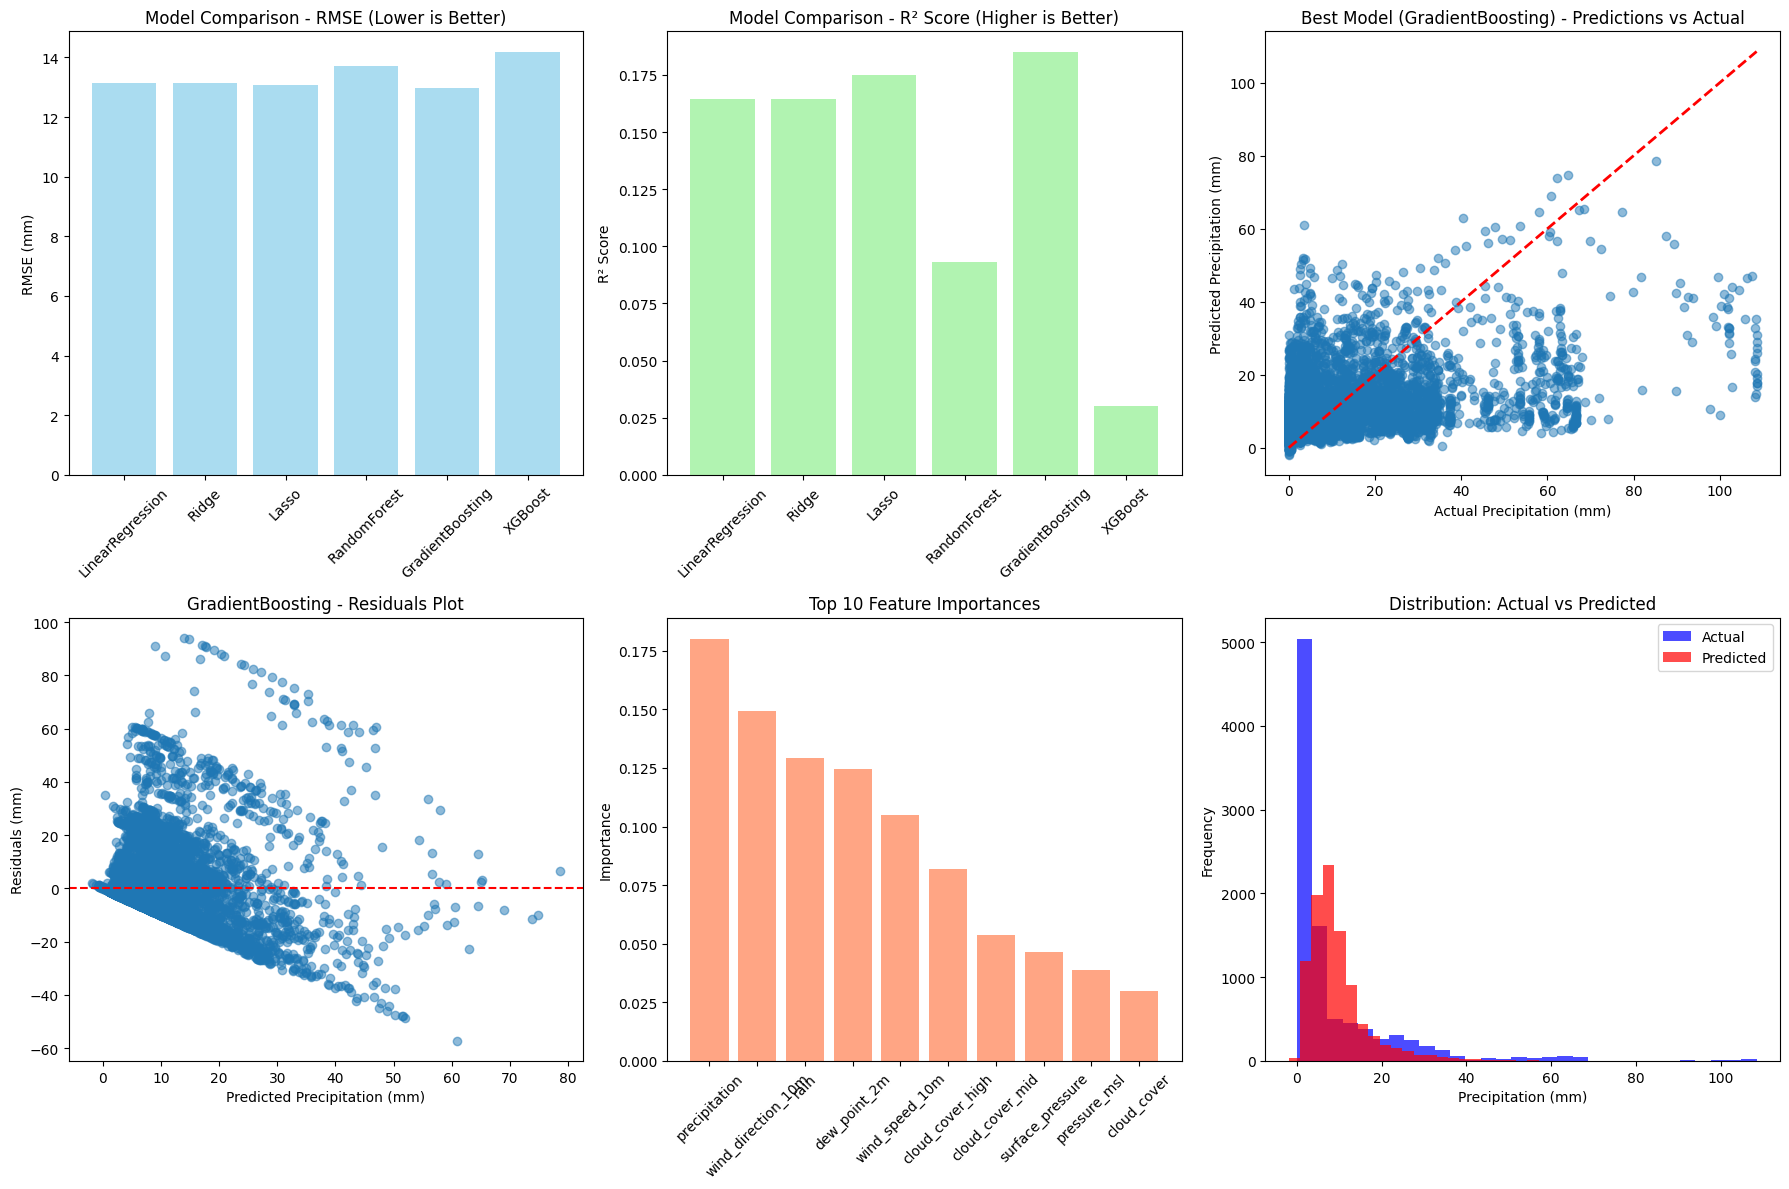


Best performing model: GradientBoosting
Test RMSE: 12.991 mm
Test R²: 0.185


In [132]:
# Visualize model performance
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot 1: Model comparison (RMSE)
test_results = results_df[results_df['Model'].str.contains('_Test')]
model_names = [name.replace('_Test', '') for name in test_results['Model']]

axes[0,0].bar(model_names, test_results['RMSE'], alpha=0.7, color='skyblue')
axes[0,0].set_title('Model Comparison - RMSE (Lower is Better)')
axes[0,0].set_ylabel('RMSE (mm)')
axes[0,0].tick_params(axis='x', rotation=45)

# Plot 2: Model comparison (R²)
axes[0,1].bar(model_names, test_results['R²'], alpha=0.7, color='lightgreen')
axes[0,1].set_title('Model Comparison - R² Score (Higher is Better)')
axes[0,1].set_ylabel('R² Score')
axes[0,1].tick_params(axis='x', rotation=45)

# Plot 3: Best model predictions vs actual
best_model_name = test_results.loc[test_results['RMSE'].idxmin(), 'Model'].replace('_Test', '')
best_predictions = trained_models[best_model_name]['test_predictions']

axes[0,2].scatter(y_test_final, best_predictions, alpha=0.5)
axes[0,2].plot([y_test_final.min(), y_test_final.max()], [y_test_final.min(), y_test_final.max()], 'r--', lw=2)
axes[0,2].set_xlabel('Actual Precipitation (mm)')
axes[0,2].set_ylabel('Predicted Precipitation (mm)')
axes[0,2].set_title(f'Best Model ({best_model_name}) - Predictions vs Actual')

# Plot 4: Residuals plot
residuals = y_test_final - best_predictions
axes[1,0].scatter(best_predictions, residuals, alpha=0.5)
axes[1,0].axhline(y=0, color='r', linestyle='--')
axes[1,0].set_xlabel('Predicted Precipitation (mm)')
axes[1,0].set_ylabel('Residuals (mm)')
axes[1,0].set_title(f'{best_model_name} - Residuals Plot')

# Plot 5: Feature importance (if available)
best_model_obj = trained_models[best_model_name]['model']
if hasattr(best_model_obj, 'feature_importances_'):
    importances = best_model_obj.feature_importances_
    feature_names = X_train_final.columns
    indices = np.argsort(importances)[::-1][:10]  # Top 10
    
    axes[1,1].bar(range(len(indices)), importances[indices], alpha=0.7, color='coral')
    axes[1,1].set_title('Top 10 Feature Importances')
    axes[1,1].set_ylabel('Importance')
    axes[1,1].set_xticks(range(len(indices)))
    axes[1,1].set_xticklabels([feature_names[i] for i in indices], rotation=45)
else:
    axes[1,1].text(0.5, 0.5, 'Feature importance\nnot available', ha='center', va='center')
    axes[1,1].set_title('Feature Importance')

# Plot 6: Prediction distribution
axes[1,2].hist(y_test_final, bins=30, alpha=0.7, label='Actual', color='blue')
axes[1,2].hist(best_predictions, bins=30, alpha=0.7, label='Predicted', color='red')
axes[1,2].set_xlabel('Precipitation (mm)')
axes[1,2].set_ylabel('Frequency')
axes[1,2].set_title('Distribution: Actual vs Predicted')
axes[1,2].legend()

plt.tight_layout()
plt.show()

print(f"\nBest performing model: {best_model_name}")
print(f"Test RMSE: {trained_models[best_model_name]['test_rmse']:.3f} mm")
print(f"Test R²: {trained_models[best_model_name]['test_r2']:.3f}")

### J.6 Save Best Model

> Save the best performing regression model for future use

In [133]:
import os
from datetime import datetime

# Create models directory if it doesn't exist
models_dir = '/Users/afrazrupak/weather_forecast/weather_forecast/models'
os.makedirs(models_dir, exist_ok=True)

# Find the best model based on lowest RMSE
test_results_clean = results_df[results_df['Model'].str.contains('_Test')]
best_idx = test_results_clean['RMSE'].idxmin()
best_model_name = test_results_clean.loc[best_idx, 'Model'].replace('_Test', '')
best_model = trained_models[best_model_name]['model']
best_rmse = trained_models[best_model_name]['test_rmse']
best_r2 = trained_models[best_model_name]['test_r2']

print(f"Best Model: {best_model_name}")
print(f"Best RMSE: {best_rmse:.4f} mm")
print(f"Best R²: {best_r2:.4f}")

# Create timestamp for versioning
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')

# Save the model using both pickle and joblib
model_filename_pkl = f'precipitation_regressor_best_{best_model_name}_{timestamp}.pkl'
model_filename_joblib = f'precipitation_regressor_best_{best_model_name}_{timestamp}.joblib'

model_path_pkl = os.path.join(models_dir, model_filename_pkl)
model_path_joblib = os.path.join(models_dir, model_filename_joblib)

# Save with pickle
with open(model_path_pkl, 'wb') as f:
    pickle.dump(best_model, f)

# Save with joblib (recommended for sklearn models)
joblib.dump(best_model, model_path_joblib)

print(f"\nModel saved as:")
print(f"- Pickle: {model_path_pkl}")
print(f"- Joblib: {model_path_joblib}")

Best Model: GradientBoosting
Best RMSE: 12.9907 mm
Best R²: 0.1848

Model saved as:
- Pickle: /Users/afrazrupak/weather_forecast/weather_forecast/models/precipitation_regressor_best_GradientBoosting_20250928_052241.pkl
- Joblib: /Users/afrazrupak/weather_forecast/weather_forecast/models/precipitation_regressor_best_GradientBoosting_20250928_052241.joblib


In [134]:
# Save model metadata and performance metrics
model_metadata = {
    'model_name': best_model_name,
    'model_type': type(best_model).__name__,
    'problem_type': 'regression',
    'target_variable': target_name,
    'prediction_horizon': '72_hours',
    'timestamp': timestamp,
    'training_date': datetime.now().isoformat(),
    'performance_metrics': {
        'rmse': float(best_rmse),
        'mae': float(trained_models[best_model_name]['test_mae']),
        'r2_score': float(best_r2)
    },
    'model_parameters': best_model.get_params(),
    'features_used': list(X_train_final.columns),
    'training_samples': len(X_train_final),
    'test_samples': len(X_test_final),
    'data_split_method': 'chronological_80_20'
}

# Save metadata
metadata_filename = f'precipitation_regressor_metadata_{best_model_name}_{timestamp}.json'
metadata_path = os.path.join(models_dir, metadata_filename)

with open(metadata_path, 'w') as f:
    json.dump(model_metadata, f, indent=2, default=str)

print(f"Model metadata saved: {metadata_path}")

Model metadata saved: /Users/afrazrupak/weather_forecast/weather_forecast/models/precipitation_regressor_metadata_GradientBoosting_20250928_052241.json


In [135]:
# Save feature importance if available
importance_filename = None
if hasattr(best_model, 'feature_importances_'):
    feature_importance_df = pd.DataFrame({
        'feature': X_train_final.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    # Save feature importance
    importance_filename = f'feature_importance_{best_model_name}_{timestamp}.csv'
    importance_path = os.path.join(models_dir, importance_filename)
    feature_importance_df.to_csv(importance_path, index=False)
    
    print(f"Feature importance saved: {importance_path}")
    print("\nTop 10 Most Important Features:")
    print(feature_importance_df.head(10))
elif hasattr(best_model, 'coef_'):
    # For linear models, use coefficient magnitudes
    feature_coef_df = pd.DataFrame({
        'feature': X_train_final.columns,
        'coefficient': best_model.coef_,
        'abs_coefficient': np.abs(best_model.coef_)
    }).sort_values('abs_coefficient', ascending=False)
    
    # Save coefficients
    coef_filename = f'model_coefficients_{best_model_name}_{timestamp}.csv'
    coef_path = os.path.join(models_dir, coef_filename)
    feature_coef_df.to_csv(coef_path, index=False)
    
    print(f"Model coefficients saved: {coef_path}")
    print("\nTop 10 Most Important Features (by |coefficient|):")
    print(feature_coef_df.head(10))
    importance_filename = coef_filename
else:
    print("Feature importance/coefficients not available for this model type")

Feature importance saved: /Users/afrazrupak/weather_forecast/weather_forecast/models/feature_importance_GradientBoosting_20250928_052241.csv

Top 10 Most Important Features:
               feature  importance
3        precipitation    0.180145
8   wind_direction_10m    0.149419
4                 rain    0.129136
2         dew_point_2m    0.124512
7       wind_speed_10m    0.104857
13    cloud_cover_high    0.082027
12     cloud_cover_mid    0.053658
10    surface_pressure    0.046573
5         pressure_msl    0.038805
6          cloud_cover    0.029835


In [136]:
# Create a comprehensive model summary report
model_summary = f"""
PRECIPITATION REGRESSION MODEL SUMMARY
=====================================

Model Information:
- Name: {best_model_name}
- Type: {type(best_model).__name__}
- Problem Type: Regression (72-hour precipitation forecast)
- Training Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
- Target Variable: {target_name}

Performance Metrics (Test Set):
- RMSE: {best_rmse:.4f} mm
- MAE: {trained_models[best_model_name]['test_mae']:.4f} mm
- R² Score: {best_r2:.4f}

Dataset Information:
- Training Samples: {len(X_train_final)}
- Test Samples: {len(X_test_final)}
- Features Used: {len(X_train_final.columns)}
- Feature List: {', '.join(X_train_final.columns)}

Files Saved:
- Model (Pickle): {model_filename_pkl}
- Model (Joblib): {model_filename_joblib}
- Metadata: {metadata_filename}
- Feature Importance: {importance_filename if importance_filename else 'N/A'}

Model Interpretation:
- RMSE of {best_rmse:.2f}mm means predictions are typically within ±{best_rmse:.2f}mm of actual values
- R² of {best_r2:.3f} means the model explains {best_r2*100:.1f}% of precipitation variance
- This model predicts precipitation amounts for the next 72 hours (3 days)

Usage Instructions:
To load and use this model:
```python
import joblib
import pandas as pd
model = joblib.load('{model_path_joblib}')
# Prepare your data with the same features: {', '.join(X_train_final.columns)}
predictions = model.predict(new_data)
# Predictions are in mm of precipitation over next 72 hours
```

Business Impact:
- Enables quantitative precipitation forecasting for water management
- Supports agricultural irrigation planning with specific rainfall amounts
- Assists in flood risk assessment with precipitation intensity predictions
- Facilitates emergency preparedness based on expected precipitation levels
"""

print(model_summary)

# Save the summary as a text file
summary_filename = f'precipitation_model_summary_{best_model_name}_{timestamp}.txt'
summary_path = os.path.join(models_dir, summary_filename)

with open(summary_path, 'w') as f:
    f.write(model_summary)

print(f"\nModel summary saved: {summary_path}")


PRECIPITATION REGRESSION MODEL SUMMARY

Model Information:
- Name: GradientBoosting
- Type: GradientBoostingRegressor
- Problem Type: Regression (72-hour precipitation forecast)
- Training Date: 2025-09-28 05:22:41
- Target Variable: precipitation_next_72h

Performance Metrics (Test Set):
- RMSE: 12.9907 mm
- MAE: 8.6012 mm
- R² Score: 0.1848

Dataset Information:
- Training Samples: 38496
- Test Samples: 9552
- Features Used: 14
- Feature List: temperature_2m, relative_humidity_2m, dew_point_2m, precipitation, rain, pressure_msl, cloud_cover, wind_speed_10m, wind_direction_10m, shortwave_radiation, surface_pressure, cloud_cover_low, cloud_cover_mid, cloud_cover_high

Files Saved:
- Model (Pickle): precipitation_regressor_best_GradientBoosting_20250928_052241.pkl
- Model (Joblib): precipitation_regressor_best_GradientBoosting_20250928_052241.joblib
- Metadata: precipitation_regressor_metadata_GradientBoosting_20250928_052241.json
- Feature Importance: feature_importance_GradientBoosti

In [137]:
# Verify that the saved model can be loaded and works correctly
print("\nVerifying saved model...")

# Load the model
loaded_model = joblib.load(model_path_joblib)

# Test prediction on a small sample
test_sample = X_test_final.head(5)
original_predictions = best_model.predict(test_sample)
loaded_predictions = loaded_model.predict(test_sample)

# Verify predictions match
predictions_match = np.allclose(original_predictions, loaded_predictions, rtol=1e-10)

print(f"Model loaded successfully: {predictions_match}")
if predictions_match:
    print("✓ Saved model produces identical predictions to original model")
    print(f"  Sample predictions: {original_predictions[:3].round(3)} mm")
else:
    print("✗ Warning: Saved model predictions differ from original model")
    print(f"  Original: {original_predictions[:3].round(3)}")
    print(f"  Loaded: {loaded_predictions[:3].round(3)}")

# Display file sizes
pkl_size = os.path.getsize(model_path_pkl) / (1024*1024)  # MB
joblib_size = os.path.getsize(model_path_joblib) / (1024*1024)  # MB

print(f"\nFile sizes:")
print(f"- Pickle file: {pkl_size:.2f} MB")
print(f"- Joblib file: {joblib_size:.2f} MB")

print(f"\nModel successfully saved to: {models_dir}")
print(f"Use joblib.load('{model_path_joblib}') to load the model for predictions.")


Verifying saved model...
Model loaded successfully: True
✓ Saved model produces identical predictions to original model
  Sample predictions: [4.05  3.831 3.311] mm

File sizes:
- Pickle file: 0.13 MB
- Joblib file: 0.14 MB

Model successfully saved to: /Users/afrazrupak/weather_forecast/weather_forecast/models
Use joblib.load('/Users/afrazrupak/weather_forecast/weather_forecast/models/precipitation_regressor_best_GradientBoosting_20250928_052241.joblib') to load the model for predictions.


### J.4 Model Technical Performance

> Provide some explanations on model performance


In [138]:
# <Student to fill this section>

In [139]:
# <Student to fill this section>
model_performance_explanations = """
Provide some explanations on model performance
"""

In [140]:
# Do not modify this code
print_tile(size="h3", key='model_performance_explanations', value=model_performance_explanations)

### J.5 Business Impact from Current Model Performance

> Provide some analysis on the model impacts from the business point of view


In [141]:
# <Student to fill this section>

In [142]:
# <Student to fill this section>
business_impacts_explanations = """
Interpret the results of the experiments related to the business objective set earlier. Estimate the impacts of the incorrect results for the business (some results may have more impact compared to others)
"""

In [143]:
# Do not modify this code
print_tile(size="h3", key='business_impacts_explanations', value=business_impacts_explanations)

## H. Project Outcomes

In [144]:
# <Student to fill this section>
experiment_outcome = "" # Either 'Hypothesis Confirmed', 'Hypothesis Partially Confirmed' or 'Hypothesis Rejected'

In [145]:
# Do not modify this code
print_tile(size="h2", key='experiment_outcomes_explanations', value=experiment_outcome)

In [146]:
# <Student to fill this section>
experiment_results_explanations = """
Reflect on the outcome of the experiment and list the new insights you gained from it. Provide rationale for pursuing more experimentation with the current approach or call out if you think it is a dead end.
Given the results achieved and the overall objective of the project, list the potential next steps and experiments. For each of them assess the expected uplift or gains and rank them accordingly. If the experiment achieved the required outcome for the business, recommend the steps to deploy this solution into production.
"""

In [147]:
# Do not modify this code
print_tile(size="h2", key='experiment_results_explanations', value=experiment_results_explanations)